# Dfs3 - Basic

In [1]:
import matplotlib.pyplot as plt
import mikeio

In [2]:
ds = mikeio.read("../tests/testdata/dissolved_oxygen.dfs3")
ds

<mikeio.Dataset>
dims: (time:1, z:17, y:112, x:91)
time: 2001-12-28 00:00:00 (time-invariant)
geometry: Grid3D(nz=17, ny=112, nx=91)
items:
  0:  Diss. oxygen (mg/l) <Concentration 3> (mg per liter)

In [3]:
ds.geometry

<mikeio.Grid3D>
x: [0, 150, ..., 1.35e+04] (nx=91, dx=150)
y: [0, 150, ..., 1.665e+04] (ny=112, dy=150)
z: [0, 1, ..., 16] (nz=17, dz=1)
origin: (5.864e+05, 6.143e+06), orientation: 17.000
projection: PROJCS["UTM-32",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",9],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]

In [4]:
do = ds[0]
do

<mikeio.DataArray>
name: Diss. oxygen (mg/l)
dims: (time:1, z:17, y:112, x:91)
time: 2001-12-28 00:00:00 (time-invariant)
geometry: Grid3D(nz=17, ny=112, nx=91)

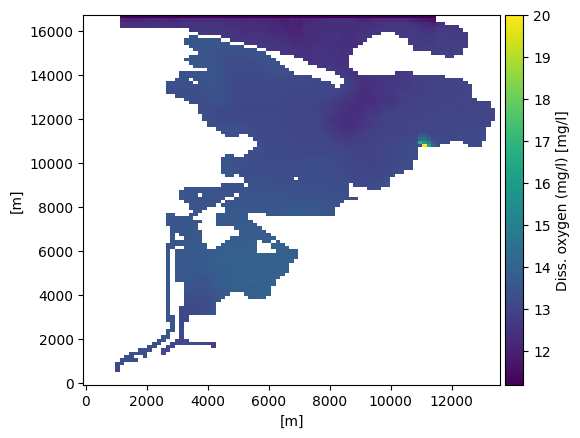

In [5]:
do.isel(z=-1).plot();

In [6]:
dst = mikeio.read("../tests/testdata/dissolved_oxygen.dfs3", layers="top")

In [7]:
dst

<mikeio.Dataset>
dims: (time:1, y:112, x:91)
time: 2001-12-28 00:00:00 (time-invariant)
geometry: Grid2D (ny=112, nx=91)
items:
  0:  Diss. oxygen (mg/l) <Concentration 3> (mg per liter)

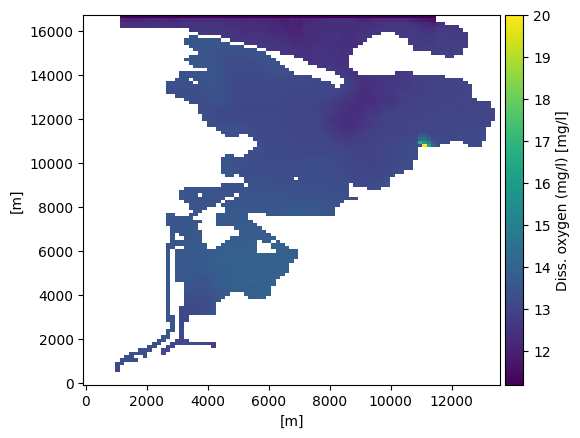

In [8]:
dst[0].plot();

In [9]:
dsb = mikeio.read("../tests/testdata/dissolved_oxygen.dfs3", layers="bottom")
dsb

<mikeio.Dataset>
dims: (time:1, y:112, x:91)
time: 2001-12-28 00:00:00 (time-invariant)
geometry: Grid2D (ny=112, nx=91)
items:
  0:  Diss. oxygen (mg/l) <Concentration 3> (mg per liter)

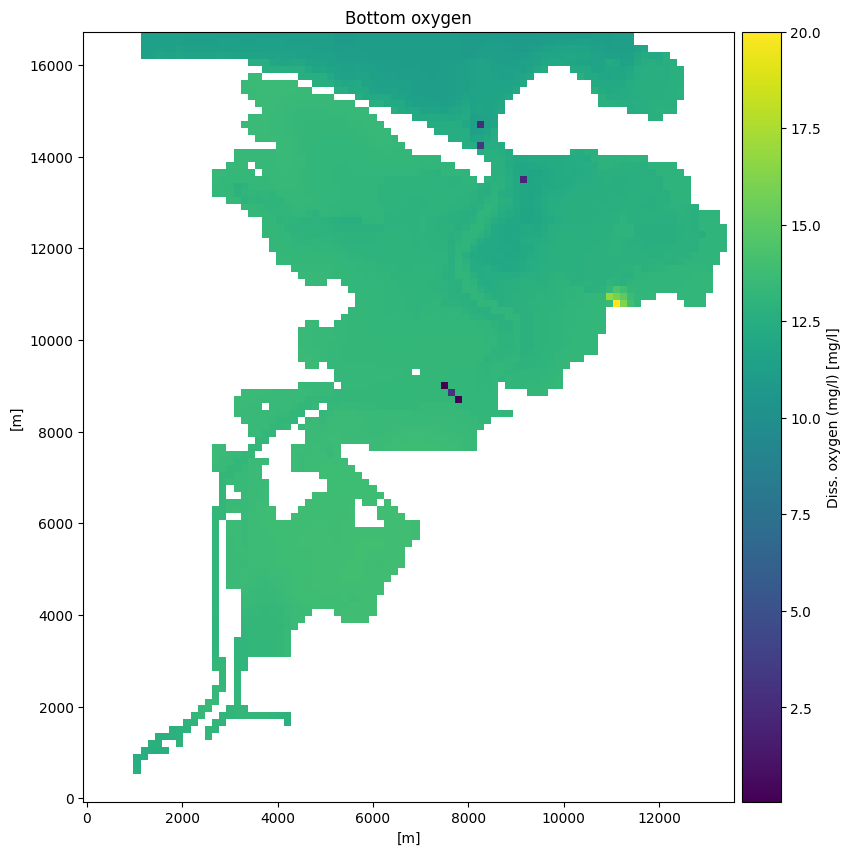

In [10]:
dsb[0].plot(figsize=(10, 10))
plt.title("Bottom oxygen");

In [11]:
dsb[0].to_numpy()[0, 110, 56]

11.07656

In [12]:
dst[0].to_numpy()[0, 110, 56]

12.409002

In [13]:
dsb[0].to_numpy()[0, 58, 52]

0.05738005

## Local coordinates

Local coordinates (*"NON-UTM"*) have a different convention. The origin is at the bottom-left corner instead of the element center. This applies to x and y coordinates.

In [27]:
import numpy as np

data = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
da = mikeio.DataArray(
    data,
    geometry=mikeio.Grid3D(
        nx=3, ny=2, nz=2, dy=0.5, dz=1, dx=0.5, projection="NON-UTM"
    ),
)
da

<mikeio.DataArray>
name: NoName
dims: (z:2, y:2, x:3)
time: 2018-01-01 00:00:00 (time-invariant)
geometry: Grid3D(nz=2, ny=2, nx=3)

In [28]:
da.geometry

<mikeio.Grid3D>
x: [0.25, 0.75, 1.25] (nx=3, dx=0.5)
y: [0.25, 0.75] (ny=2, dy=0.5)
z: [0, 1] (nz=2, dz=1)
origin: (0, 0), orientation: 0.000
projection: NON-UTM

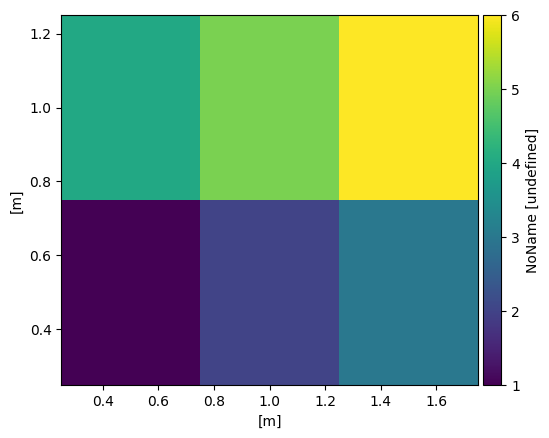

In [32]:
da.isel(z=0).plot();

In [36]:
da.to_xarray()

<xarray.DataArray 'NoName' (z: 2, y: 2, x: 3)>
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])
Coordinates:
  * z        (z) float64 0.0 1.0
  * y        (y) float64 0.25 0.75
  * x        (x) float64 0.25 0.75 1.25
Attributes:
    name:     NoName
    units:    undefined
    eumType:  EUMType.Undefined
    eumUnit:  EUMUnit.undefined